<a href="https://colab.research.google.com/github/IsaiahHanna/Career-Paths/blob/main/CareerPaths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/files/bc-student-outcomes-program-data-viewer-file-2021-to-2023.csv'

# Import Required Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Data Exploration and Analysis

In [ ]:
# load dataset
pd.set_option('display.max_columns', None)
data_original = pd.read_csv(path)
data_original

CREDENTIAL                       GROUPBY INSTITUTION  \
0     Certificate       Institution and Program         NLC   
1     Certificate       Institution and Program         NLC   
2     Certificate       Institution and Program         SEL   
3     Certificate       Institution and Program         SEL   
4     Certificate       Institution and Program         SEL   
...           ...                           ...         ...   
2097      Diploma  Institution and Program Area        NVIT   
2098      Diploma  Institution and Program Area        NVIT   
2099      Diploma  Institution and Program Area        NVIT   
2100      Diploma  Institution and Program Area        NVIT   
2101      Diploma  Institution and Program Area        CAPU   

                           INSTITUTION_NAME PROGRAM_AREA  \
0                   Northern Lights College            6   
1                   Northern Lights College            6   
2                           Selkirk College            3   
3                           Selkirk College            4   
4                           Selkirk College            4   
...                                     ...          ...   
2097  Nicola Valley Institute of Technology            1   
2098  Nicola Valley Institute of Technology            3   
2099  Nicola Valley Institute of Technology            4   
2100  Nicola Valley Institute of Technology            5   
2101                    Capilano University            1   

                     PROGRAM_AREA_NAME  \
0                            Education   
1                            Education   
2              Business and Management   
3                               Health   
4                               Health   
...                                ...   
2097                 Arts and Sciences   
2098           Business and Management   
2099                            Health   
2100  Engineering and Applied Sciences   
2101                 Arts and Sciences   

                                        PROGRAM_NAME  RESPONDENTS  \
0                                Education Assistant           39   
1                    Education Assistant Certificate           27   
2     Office Administration & Technology Certificate           27   
3                                 Nursing Unit Clerk           53   
4                              Health Care Assistant           93   
...                                              ...          ...   
2097                                    All Programs           14   
2098                                    All Programs           12   
2099                                    All Programs           27   
2100                                    All Programs           14   
2101                                    All Programs          169   

      RESPONSE_RATE   AGE  FEMALE    MALE    Q49A   Q51NA   Q51NB   Q51ND  \
0            0.6393  41.0 -2.0000 -1.0000  0.9743  0.9705  0.9444  0.9736   
1            0.5510  42.0 -2.0000 -1.0000  0.9615  0.9090  0.8695  0.9230   
2            0.6136  36.0 -2.0000 -1.0000  0.8518  1.0000  0.6956  0.6923   
3            0.5047  37.0 -2.0000 -1.0000  0.7924  0.7027  0.5517  0.6578   
4            0.5670  36.0  0.9032  0.0967  0.9347  0.8500  0.8928  0.9418   
...             ...   ...     ...     ...     ...     ...     ...     ...   
2097         0.6666  48.5 -2.0000 -1.0000  1.0000  1.0000  0.9285  0.7692   
2098         0.6315  40.5  1.0000  0.0000  0.9166  0.8333  0.8333  0.7500   
2099         0.6750  36.0 -2.0000 -1.0000  1.0000  0.9259  1.0000  0.9615   
2100         0.3684  31.0  0.4285  0.5714  0.8571  1.0000  1.0000  0.9230   
2101         0.5596  23.0  0.6390  0.3609  0.9277  0.8303  0.8166  0.9146   

      Q51NE1  Q51NE2   Q51NI   Q51NJ    Q52A  SELF_EMPLOYED  EMPLOY_FULL_TIME  \
0     0.9743  0.8461  0.9487  1.0000  1.0000        -6.0000            0.5428   
1     0.8846  0.9629  1.0000  0.8518  0.9629        -6.0000            0.7083   
2     0.8888  0.7916  0.777

In [ ]:
#Creating a copy of original data set
data = data_original.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CREDENTIAL           2102 non-null   object 
 1   GROUPBY              2102 non-null   object 
 2   INSTITUTION          2102 non-null   object 
 3   INSTITUTION_NAME     2102 non-null   object 
 4   PROGRAM_AREA         2102 non-null   object 
 5   PROGRAM_AREA_NAME    2102 non-null   object 
 6   PROGRAM_NAME         2102 non-null   object 
 7   RESPONDENTS          2102 non-null   int64  
 8   RESPONSE_RATE        2102 non-null   float64
 9   AGE                  2102 non-null   float64
 10  FEMALE               2102 non-null   float64
 11  MALE                 2102 non-null   float64
 12  Q49A                 2102 non-null   float64
 13  Q51NA                2102 non-null   float64
 14  Q51NB                2102 non-null   float64
 15  Q51ND                2102 non-null   f

In [ ]:
data.describe()


RESPONDENTS  RESPONSE_RATE          AGE       FEMALE         MALE  \
count   2102.000000    2102.000000  2102.000000  2102.000000  2102.000000   
mean     191.318268       0.494679    27.473121    -0.011110    -0.430435   
std      988.596133       0.114453     5.099054     0.979682     1.812471   
min       10.000000       0.162700    18.000000    -3.000000    -5.000000   
25%       21.000000       0.413700    25.000000    -1.000000    -1.000000   
50%       40.000000       0.488150    26.000000     0.440900     0.310150   
75%      102.000000       0.565200    29.500000     0.674875     0.541325   
max    27549.000000       1.000000    53.000000     1.000000     1.000000   

              Q49A        Q51NA        Q51NB        Q51ND       Q51NE1  \
count  2102.000000  2102.000000  2102.000000  2102.000000  2102.000000   
mean      0.905641     0.825071     0.809833     0.858180     0.908733   
std       0.084016     0.121326     0.116917     0.100155     0.068451   
min       0.111100     0.000000     0.000000     0.375000     0.500000   
25%       0.875000     0.761900     0.744925     0.807000     0.875000   
50%       0.918600     0.847700     0.823800     0.877500     0.916600   
75%       0.956500     0.909000     0.893400     0.928500     0.952300   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            Q51NE2        Q51NI        Q51NJ         Q52A  SELF_EMPLOYED  \
count  2102.000000  2102.000000  2102.000000  2102.000000    2102.000000   
mean      0.850029     0.881928     0.896388     0.935832      -8.950762   
std       0.092430     0.072400     0.075411     0.070906      23.951736   
min       0.388800     0.466600     0.411700     0.303000     -99.000000   
25%       0.802150     0.846225     0.859700     0.911700      -6.000000   
50%       0.861100     0.888800     0.907900     0.951200      -3.000000   
75%       0.913000     0.928325     0.944400     0.985150       0.000000   
max       1.000000     1.000000     1.000000     1.000000       0.716600   

       EMPLOY_FULL_TIME  JOB_PROGRAM_RELATED  USEFUL_PERFORM_JOB  IN_LABR_MKT  \
count       2102.000000          2102.000000         2102.000000  2102.000000   
mean         -11.503596             0.739386            0.846907     0.911049   
std           27.485203             0.206001            0.125734     0.102865   
min          -99.000000             0.000000            0.125000     0.142800   
25%           -9.000000             0.611100            0.795975     0.880625   
50%            0.545400             0.785150            0.873950     0.943150   
75%            0.891000             0.900000            0.933300     0.978875   
max            1.000000             1.000000            1.000000     1.000000   

          EMPLOYED   UNEMPLOYED    SALARY_WAGE  FURTH_STUDIES       Q11_7  \
count  2102.000000  2102.000000    2102.000000    1656.000000  207.000000   
mean     -3.565723   -46.175716   16583.333325       0.373285    0.860477   
std       7.279576    49.336193   27710.889258       0.219424    0.083756   
min     -99.000000   -99.000000     -99.000000       0.000000    0.571400   
25%     -11.000000   -99.000000      20.852500       0.200000    0.812500   
50%       0.716900    -1.500000      26.500000       0.343950    0.857100   
75%       0.857100     0.067050   42527.730000       0.519625    0.921500   
max       1.000000     0.416600  145000.000000       1.000000    1.000000   

            Q52_6  
count  239.000000  
mean     0.612088  
std      0.160636  
min      0.000000  
25%      0.500000  
50%      0.613600  
75%      0.724100  
max      1.000000

In [ ]:
#Shape of data
data.shape

(2102, 32)

<Axes: >

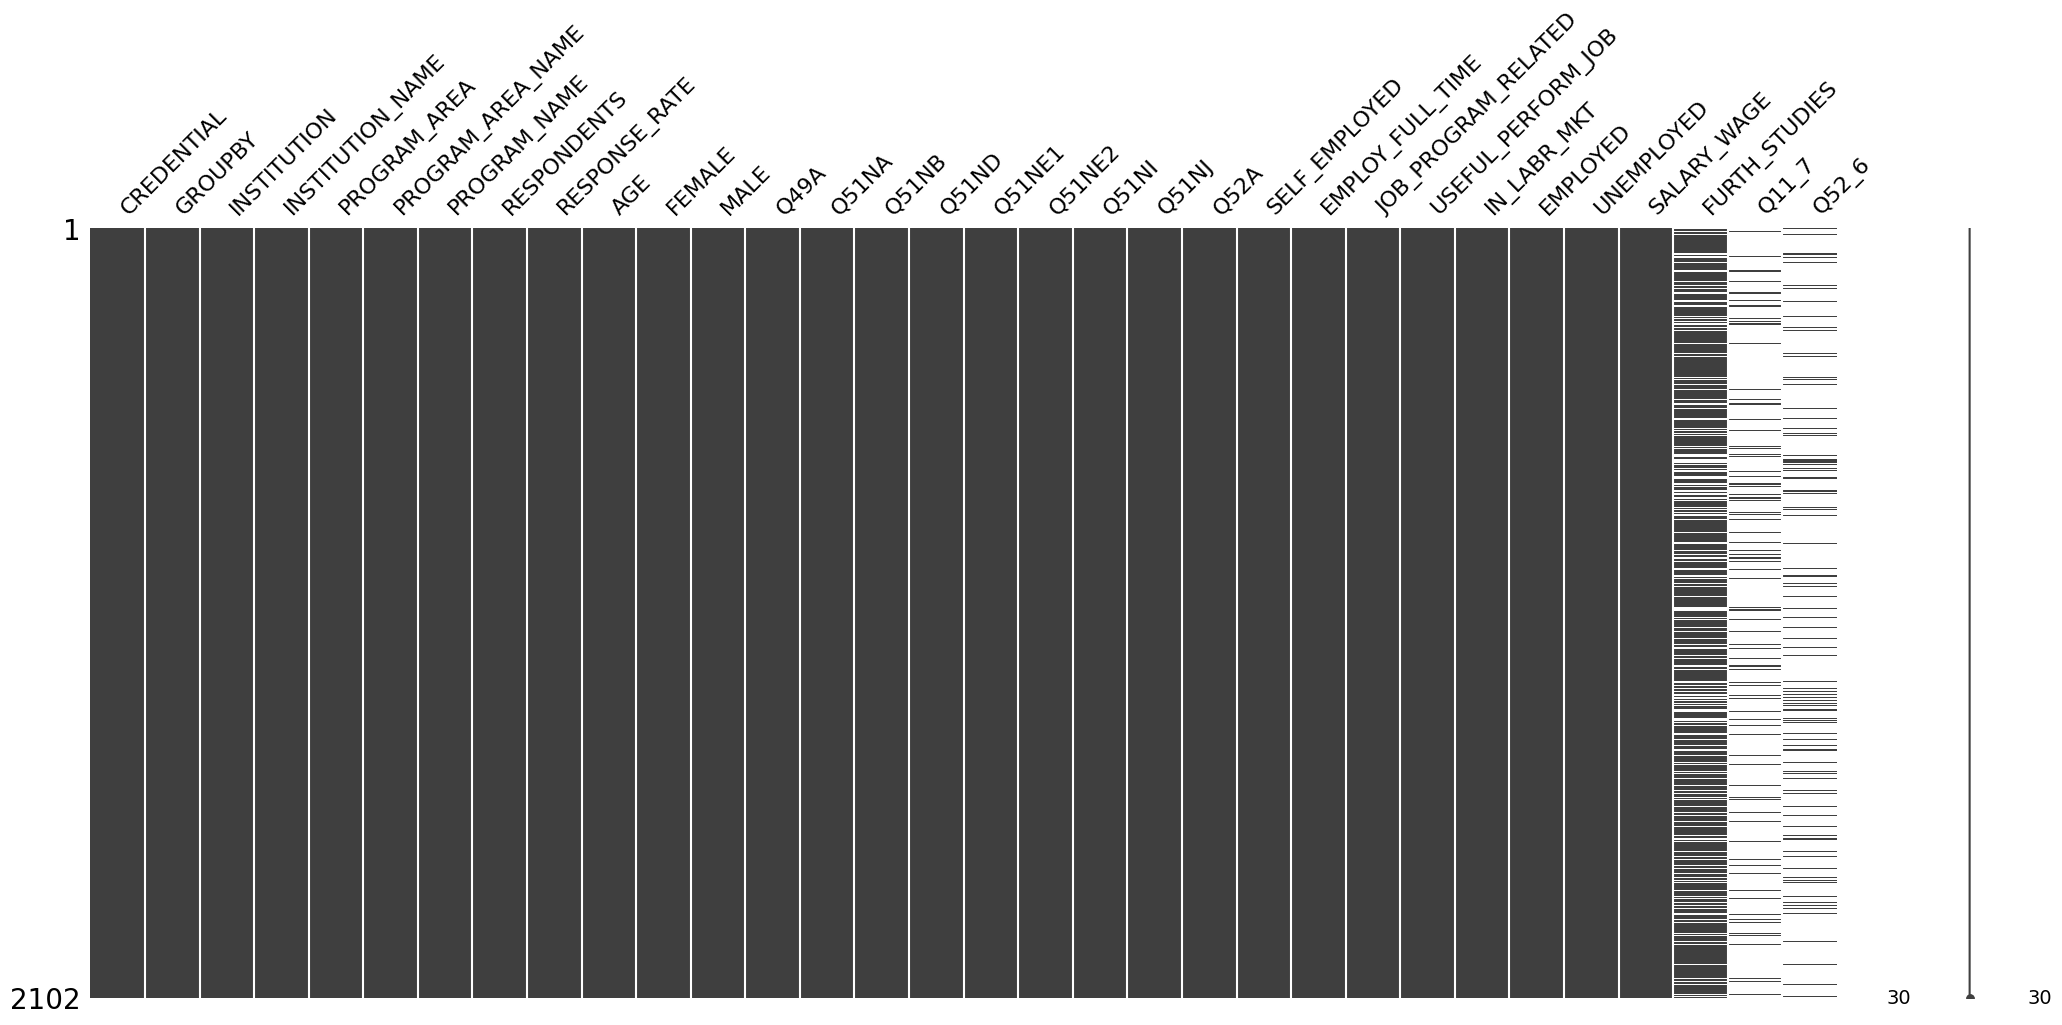

In [ ]:
# Visualising Missing Values
import missingno as msno
msno.matrix(data.sample(2102))

In [ ]:
#Dropping the duplicate rows
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 32)


In [ ]:
# see are the missing value by Percentage
missing_percentage = data.isnull().sum().sort_values(ascending=False)/len(data)*100
missing_percentage

Q11_7                  90.152236
Q52_6                  88.629876
FURTH_STUDIES          21.217888
GROUPBY                 0.000000
SALARY_WAGE             0.000000
UNEMPLOYED              0.000000
EMPLOYED                0.000000
IN_LABR_MKT             0.000000
USEFUL_PERFORM_JOB      0.000000
JOB_PROGRAM_RELATED     0.000000
EMPLOY_FULL_TIME        0.000000
SELF_EMPLOYED           0.000000
Q52A                    0.000000
Q51NJ                   0.000000
Q51NI                   0.000000
Q51NE2                  0.000000
CREDENTIAL              0.000000
Q51ND                   0.000000
Q51NB                   0.000000
Q51NA                   0.000000
Q49A                    0.000000
MALE                    0.000000
FEMALE                  0.000000
AGE                     0.000000
RESPONSE_RATE           0.000000
RESPONDENTS             0.000000
PROGRAM_NAME            0.000000
PROGRAM_AREA_NAME       0.000000
PROGRAM_AREA            0.000000
INSTITUTION_NAME        0.000000
INSTITUTION             0.000000
Q51NE1                  0.000000
dtype: float64

# Understanding the Data

## Student Groups

In [ ]:

credential_counts = data["CREDENTIAL"].value_counts()
credential_counts

CREDENTIAL
Bachelor's Degree    604
Diploma              521
Certificate          424
Trades Foundation    239
Apprenticeship       207
Associate Degree     107
Name: count, dtype: int64

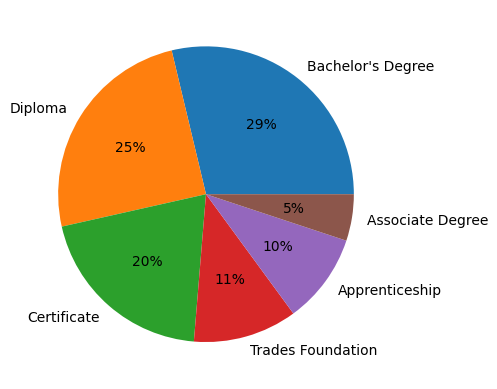

In [ ]:
plt.pie(credential_counts, labels=credential_counts.index, autopct='%1.0f%%')
plt.show()

## Filter Selections



In [ ]:
groupby_counts = data["GROUPBY"].value_counts()
groupby_counts

GROUPBY
Institution and Program         1446
Institution and Program Area     499
Institution                      104
Program Area                      47
All Institutions                   6
Name: count, dtype: int64

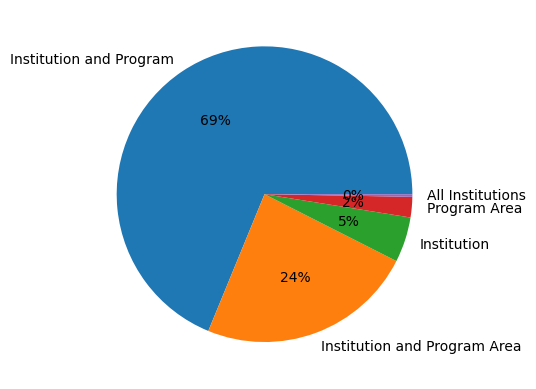

In [ ]:
plt.pie(groupby_counts, labels=groupby_counts.index, autopct='%1.0f%%')
plt.show()

## Institution

In [ ]:
institution_name_counts = data["INSTITUTION_NAME"].value_counts()
institution_name_counts


INSTITUTION_NAME
British Columbia Institute of Technology    259
Thompson Rivers University                  135
Camosun College                             127
Okanagan College                            109
Kwantlen Polytechnic University             109
Vancouver Island University                 103
University of British Columbia Vancouver    103
Douglas College                             102
Langara College                             100
University of the Fraser Valley              94
Vancouver Community College                  93
College of New Caledonia                     76
Capilano University                          73
College of the Rockies                       66
Selkirk College                              65
North Island College                         64
Simon Fraser University                      64
University of Victoria                       63
Northern Lights College                      50
All Institutions                             44
University of British Columbia Okanagan      40
Justice Institute of BC                      34
Coast Mountain College                       34
Nicola Valley Institute of Technology        30
University of Northern British Columbia      25
Royal Roads University                       16
Emily Carr University of Art and Design      15
All Institutions (public & private)           9
Name: count, dtype: int64

In [ ]:
total_institutions = data["INSTITUTION_NAME"].nunique()
total_institutions


28

## Programs

In [ ]:
program_area_name_counts = data["PROGRAM_AREA_NAME"].value_counts()

program_area_name_counts

PROGRAM_AREA_NAME
Business and Management                                        300
Engineering and Applied Sciences                               261
Health                                                         228
Human and Social Services                                      192
Arts and Sciences                                              157
Visual and Performing Arts                                     120
All CIP Clusters                                               110
Social Sciences                                                 89
Industrial and Heavy Duty Mechanics and Other Repair Trades     77
Automotive and Other Mechanics                                  75
Welding and Precision Production                                66
Education                                                       65
Humanities                                                      62
Biological Science and Life Sciences                            54
Culinary Arts and Personal Services                             54
Carpentry                                                       52
Electrician                                                     49
Physical Sciences and Math                                      40
Plumbing                                                        27
Trades                                                           9
Other Apprenticeship Programs                                    8
Other Trades Foundation Programs                                 7
Name: count, dtype: int64

In [ ]:
total_program_name_area = data["PROGRAM_AREA_NAME"].nunique()
total_program_name_area


22

In [ ]:
program__name_counts = data["PROGRAM_NAME"].value_counts()
program__name_counts


PROGRAM_NAME
All Programs                                              656
Bachelor of Science in Nursing                             12
Health Care Assistant                                      11
Bachelor of Business Administration                         9
Bachelor of Social Work                                     7
                                                         ... 
Graphic Design Diploma                                      1
Jewellery Art & Design                                      1
Forestry Technology Diploma                                 1
Fisheries and Aquaculture Technology Diploma                1
Applied Business Technology - Administrative Assistant      1
Name: count, Length: 1141, dtype: int64

## Age and Gender

<Axes: ylabel='AGE'>

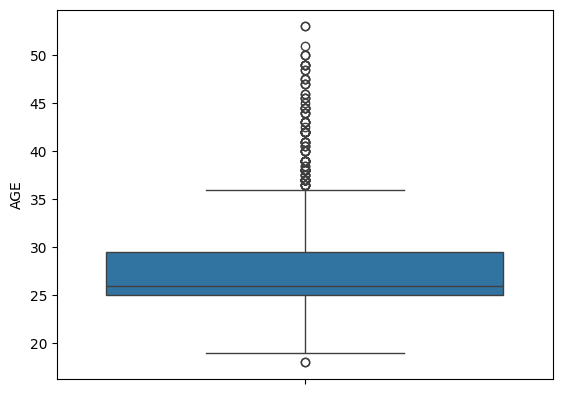

In [62]:
sns.boxplot(y=data['AGE'])

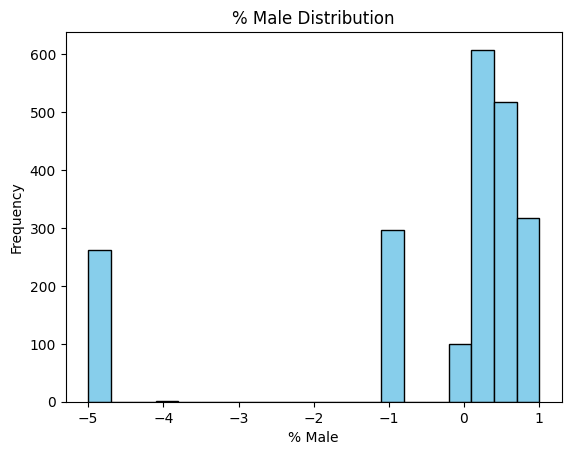

In [77]:
# Create the histogram of the 'MALE' column
plt.hist(data['MALE'], bins=20, edgecolor='black', color='skyblue')

# Add title and labels
plt.title('% Male Distribution')
plt.xlabel('% Male')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

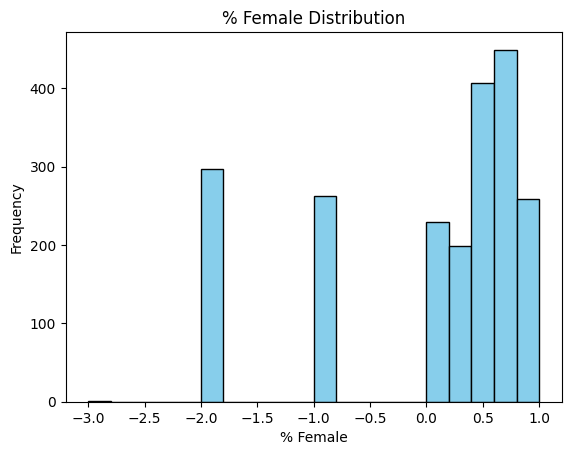

In [78]:
# Create the histogram of the 'FEMALE' column
plt.hist(data['FEMALE'], bins=20, edgecolor='black', color='skyblue')

# Add title and labels
plt.title('% Female Distribution')
plt.xlabel('% Female')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

## Satisfaction with their Education

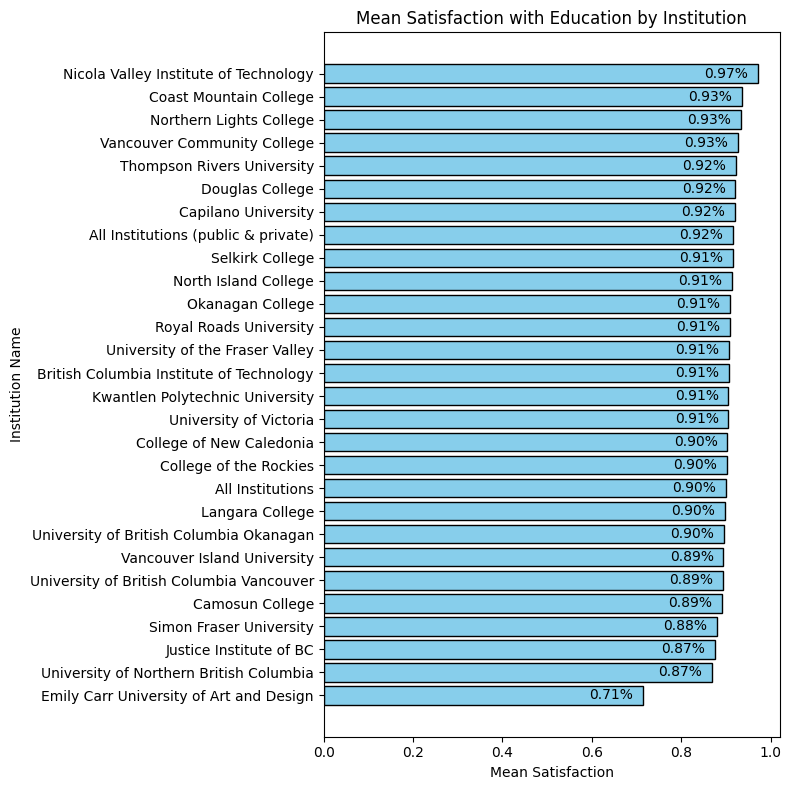

In [121]:
# Calculate the mean for 'Q49A' for each institution
mean_satisfaction = data.groupby("INSTITUTION_NAME")["Q49A"].mean().sort_values(ascending=True)

# Set up the figure for the horizontal bar chart
plt.figure(figsize=(8, 8))

# Horizontal bar chart for mean satisfaction
mean_bars = plt.barh(mean_satisfaction.index, mean_satisfaction.values, color='skyblue', edgecolor='black')
plt.title('Mean Satisfaction with Education by Institution')
plt.xlabel('Mean Satisfaction')
plt.ylabel('Institution Name')

# Adding percentage labels inside the bars
for bar in mean_bars:
    width = bar.get_width()
    plt.text(width - 0.12, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', color='Black')

# Adjust layout
plt.tight_layout()

# Show the horizontal bar chart
plt.show()
#% who said they were "Very satisfied" or "Somewhat satisfied" with
#their education or training. Based on respondents who rated on a
#four-point scale from "Very satisfied" to "Very dissatisfied".

## Satisfaction with the Skills

### Write Clearly and Concisely


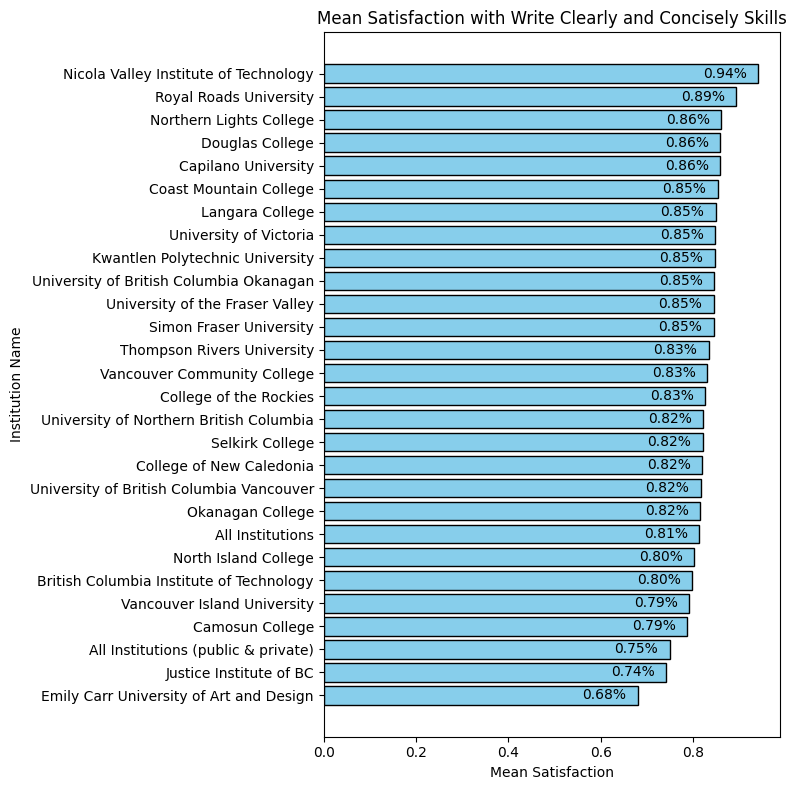

In [122]:
# Calculate the mean for 'Q51NA' for each institution
mean_satisfaction = data.groupby("INSTITUTION_NAME")["Q51NA"].mean().sort_values(ascending=True)

# Set up the figure for the horizontal bar chart
plt.figure(figsize=(8, 8))

# Horizontal bar chart for mean satisfaction
mean_bars = plt.barh(mean_satisfaction.index, mean_satisfaction.values, color='skyblue', edgecolor='black')
plt.title('Mean Satisfaction with Write Clearly and Concisely Skills')
plt.xlabel('Mean Satisfaction')
plt.ylabel('Institution Name')

# Adding percentage labels inside the bars
for bar in mean_bars:
    width = bar.get_width()
    plt.text(width - 0.12, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', color='Black')

# Adjust layout
plt.tight_layout()

# Show the horizontal bar chart
plt.show()


### Speak effectively


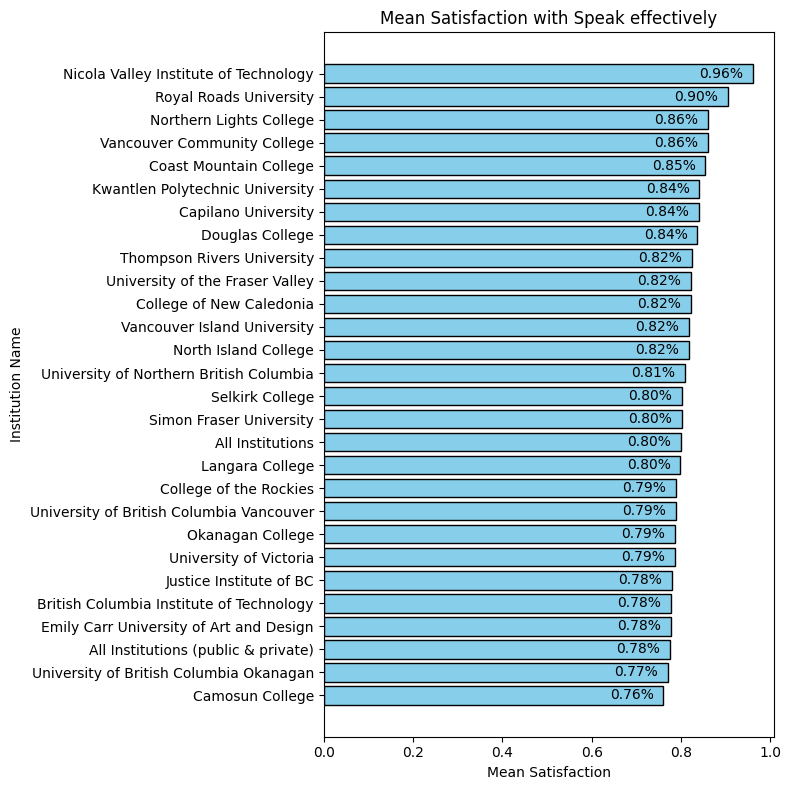

In [123]:
# Calculate the mean for 'Q51NA' for each institution
mean_satisfaction = data.groupby("INSTITUTION_NAME")["Q51NB"].mean().sort_values(ascending=True)

# Set up the figure for the horizontal bar chart
plt.figure(figsize=(8, 8))

# Horizontal bar chart for mean satisfaction
mean_bars = plt.barh(mean_satisfaction.index, mean_satisfaction.values, color='skyblue', edgecolor='black')
plt.title('Mean Satisfaction with Speak effectively')
plt.xlabel('Mean Satisfaction')
plt.ylabel('Institution Name')

# Adding percentage labels inside the bars
for bar in mean_bars:
    width = bar.get_width()
    plt.text(width - 0.12, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', color='Black')

# Adjust layout
plt.tight_layout()

# Show the horizontal bar chart
plt.show()

### Work effectively with others

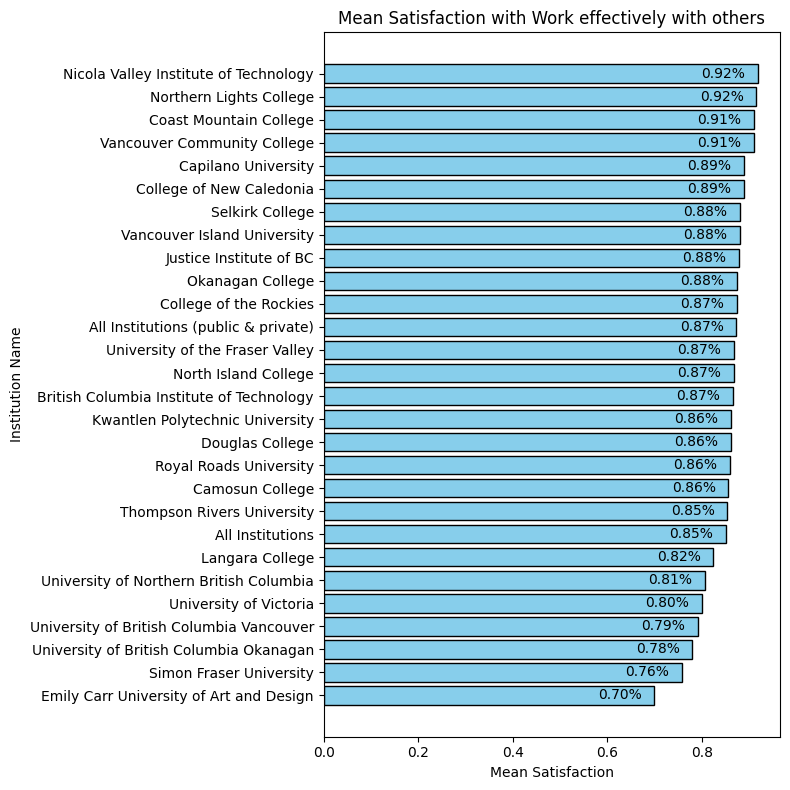

In [124]:
# Calculate the mean for 'Q51NA' for each institution
mean_satisfaction = data.groupby("INSTITUTION_NAME")["Q51ND"].mean().sort_values(ascending=True)

# Set up the figure for the horizontal bar chart
plt.figure(figsize=(8, 8))

# Horizontal bar chart for mean satisfaction
mean_bars = plt.barh(mean_satisfaction.index, mean_satisfaction.values, color='skyblue', edgecolor='black')
plt.title('Mean Satisfaction with Work effectively with others')
plt.xlabel('Mean Satisfaction')
plt.ylabel('Institution Name')

# Adding percentage labels inside the bars
for bar in mean_bars:
    width = bar.get_width()
    plt.text(width - 0.12, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', color='Black')

# Adjust layout
plt.tight_layout()

# Show the horizontal bar chart
plt.show()

###Analyse and think critically

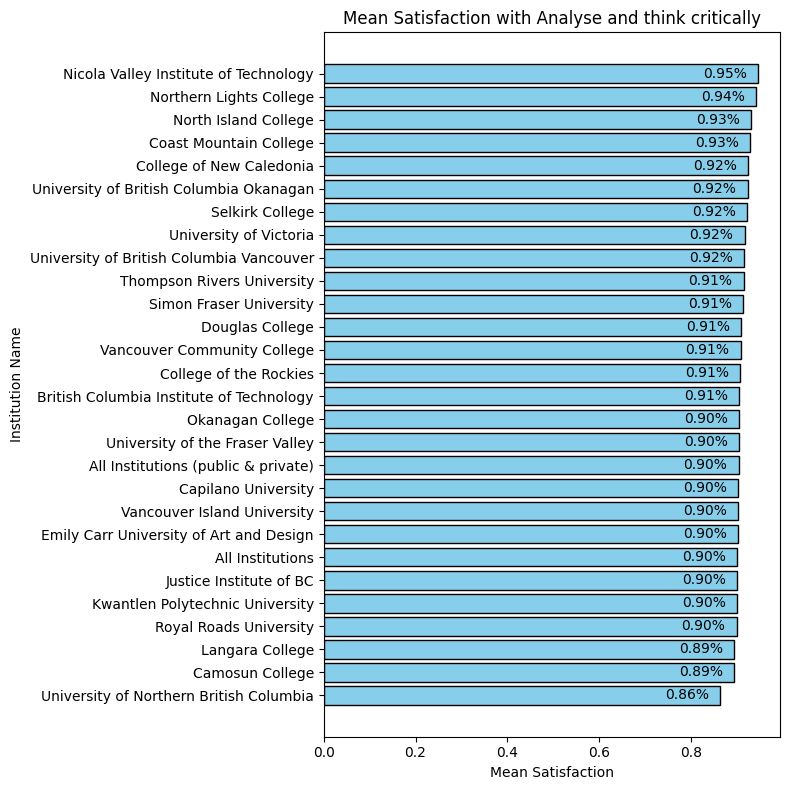

In [125]:
# Calculate the mean for 'Q51NA' for each institution
mean_satisfaction = data.groupby("INSTITUTION_NAME")["Q51NE1"].mean().sort_values(ascending=True)

# Set up the figure for the horizontal bar chart
plt.figure(figsize=(8, 8))

# Horizontal bar chart for mean satisfaction
mean_bars = plt.barh(mean_satisfaction.index, mean_satisfaction.values, color='skyblue', edgecolor='black')
plt.title('Mean Satisfaction with Analyse and think critically')
plt.xlabel('Mean Satisfaction')
plt.ylabel('Institution Name')

# Adding percentage labels inside the bars
for bar in mean_bars:
    width = bar.get_width()
    plt.text(width - 0.12, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', color='Black')

# Adjust layout
plt.tight_layout()

# Show the horizontal bar chart
plt.show()

### Resolve Issues

In [ ]:
# Calculate the mean for 'Q51NE2' for each institution
mean_satisfaction = data.groupby("INSTITUTION_NAME")["Q51NE2"].mean().sort_values(ascending=True)

# Set up the figure for the horizontal bar chart
plt.figure(figsize=(8, 8))

# Horizontal bar chart for mean satisfaction
mean_bars = plt.barh(mean_satisfaction.index, mean_satisfaction.values, color='skyblue', edgecolor='black')
plt.title('Mean Satisfaction with Resolve Issues')
plt.xlabel('Mean Satisfaction')
plt.ylabel('Institution Name')

# Adding percentage labels inside the bars
for bar in mean_bars:
    width = bar.get_width()
    plt.text(width - 0.12, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', color='Black')

# Adjust layout
plt.tight_layout()

# Show the horizontal bar chart
plt.show()

### Learn on your Own

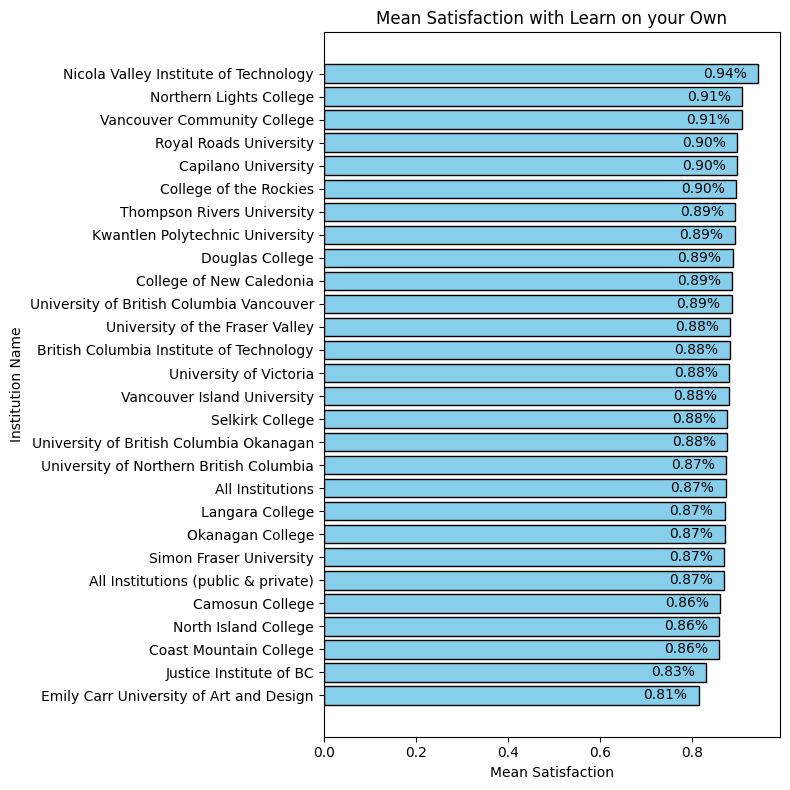

In [127]:
# Calculate the mean for 'Q51NI' for each institution
mean_satisfaction = data.groupby("INSTITUTION_NAME")["Q51NI"].mean().sort_values(ascending=True)

# Set up the figure for the horizontal bar chart
plt.figure(figsize=(8, 8))

# Horizontal bar chart for mean satisfaction
mean_bars = plt.barh(mean_satisfaction.index, mean_satisfaction.values, color='skyblue', edgecolor='black')
plt.title('Mean Satisfaction with Learn on your Own')
plt.xlabel('Mean Satisfaction')
plt.ylabel('Institution Name')

# Adding percentage labels inside the bars
for bar in mean_bars:
    width = bar.get_width()
    plt.text(width - 0.12, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', color='Black')

# Adjust layout
plt.tight_layout()

# Show the horizontal bar chart
plt.show()

### Read and comprehend material

In [ ]:
# Calculate the mean for 'Q51NJ' for each institution
mean_satisfaction = data.groupby("INSTITUTION_NAME")["Q51NJ"].mean().sort_values(ascending=True)

# Set up the figure for the horizontal bar chart
plt.figure(figsize=(8, 8))

# Horizontal bar chart for mean satisfaction
mean_bars = plt.barh(mean_satisfaction.index, mean_satisfaction.values, color='skyblue', edgecolor='black')
plt.title('Mean Satisfaction with Read and comprehend material')
plt.xlabel('Mean Satisfaction')
plt.ylabel('Institution Name')

# Adding percentage labels inside the bars
for bar in mean_bars:
    width = bar.get_width()
    plt.text(width - 0.12, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', color='Black')

# Adjust layout
plt.tight_layout()

# Show the horizontal bar chart
plt.show()

### Quality for Instruction

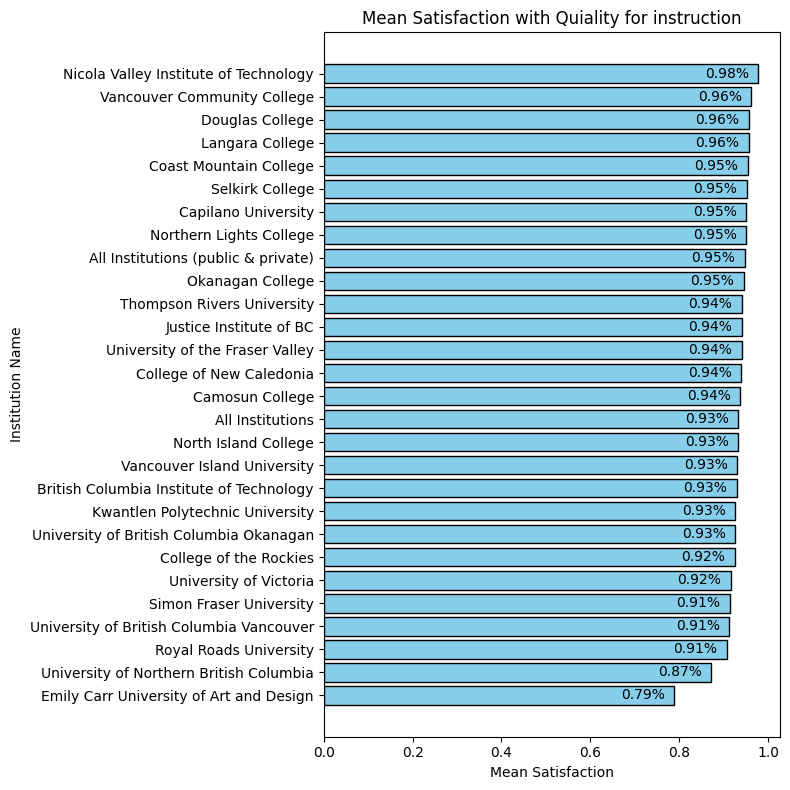

In [128]:
# Calculate the mean for 'Q52A' for each institution
mean_satisfaction = data.groupby("INSTITUTION_NAME")["Q52A"].mean().sort_values(ascending=True)

# Set up the figure for the horizontal bar chart
plt.figure(figsize=(8, 8))

# Horizontal bar chart for mean satisfaction
mean_bars = plt.barh(mean_satisfaction.index, mean_satisfaction.values, color='skyblue', edgecolor='black')
plt.title('Mean Satisfaction with Quiality for instruction')
plt.xlabel('Mean Satisfaction')
plt.ylabel('Institution Name')

# Adding percentage labels inside the bars
for bar in mean_bars:
    width = bar.get_width()
    plt.text(width - 0.12, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', color='Black')

# Adjust layout
plt.tight_layout()

# Show the horizontal bar chart
plt.show()

## Employment

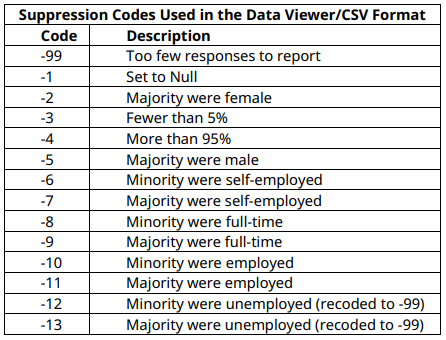

### Self Employed

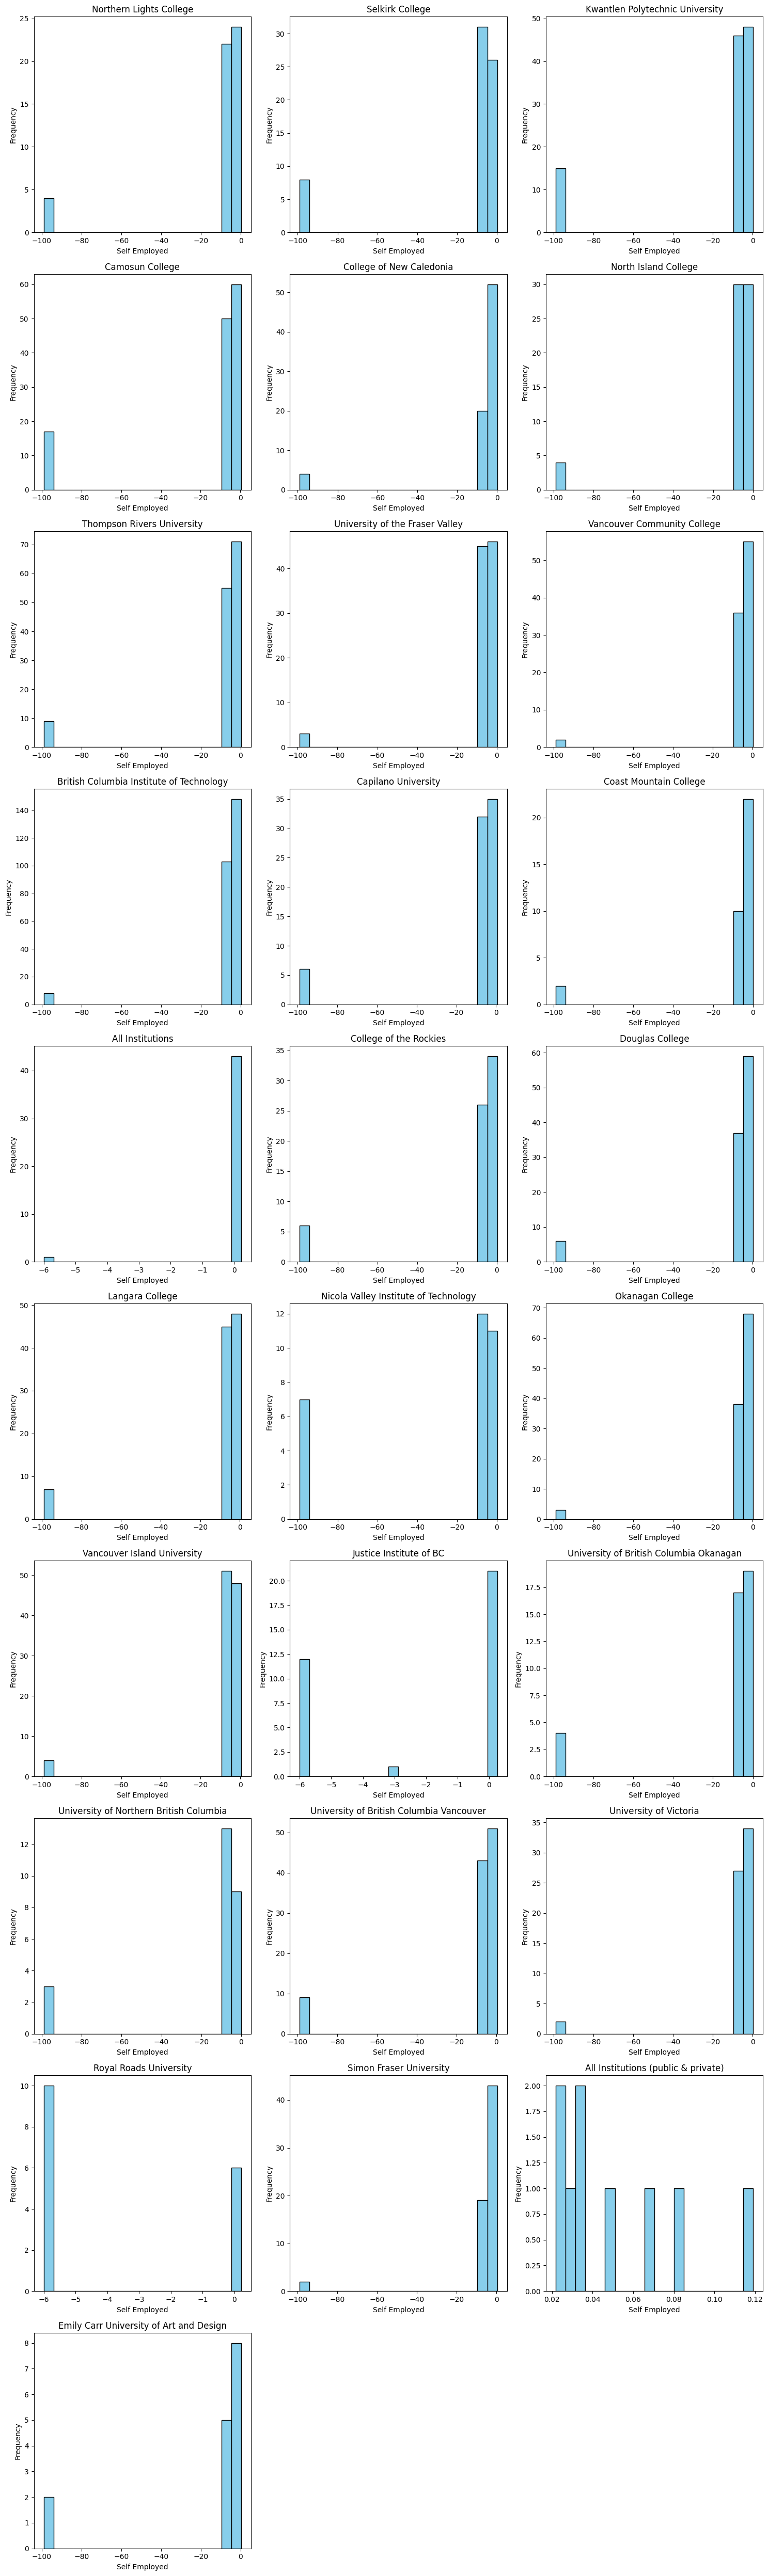

In [129]:

# Get the unique institution names
unique_institutions = data["INSTITUTION_NAME"].unique()

# Set the number of subplots based on the number of unique institutions
n_institutions = len(unique_institutions)
n_rows = (n_institutions + 2) // 3  # Arrange 3 histograms per row

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each unique institution and create a histogram
for i, institution in enumerate(unique_institutions):
    # Filter the data for the current institution
    institution_data = data[data["INSTITUTION_NAME"] == institution]

    # Create the histogram of the 'SELF_EMPLOYED' column for the current institution
    axes[i].hist(institution_data['SELF_EMPLOYED'], bins=20, edgecolor='black', color='skyblue')

    # Add title and labels
    axes[i].set_title(f'{institution}')
    axes[i].set_xlabel('Self Employed')
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()

# Show the histograms
plt.show()

### Employed Full Time

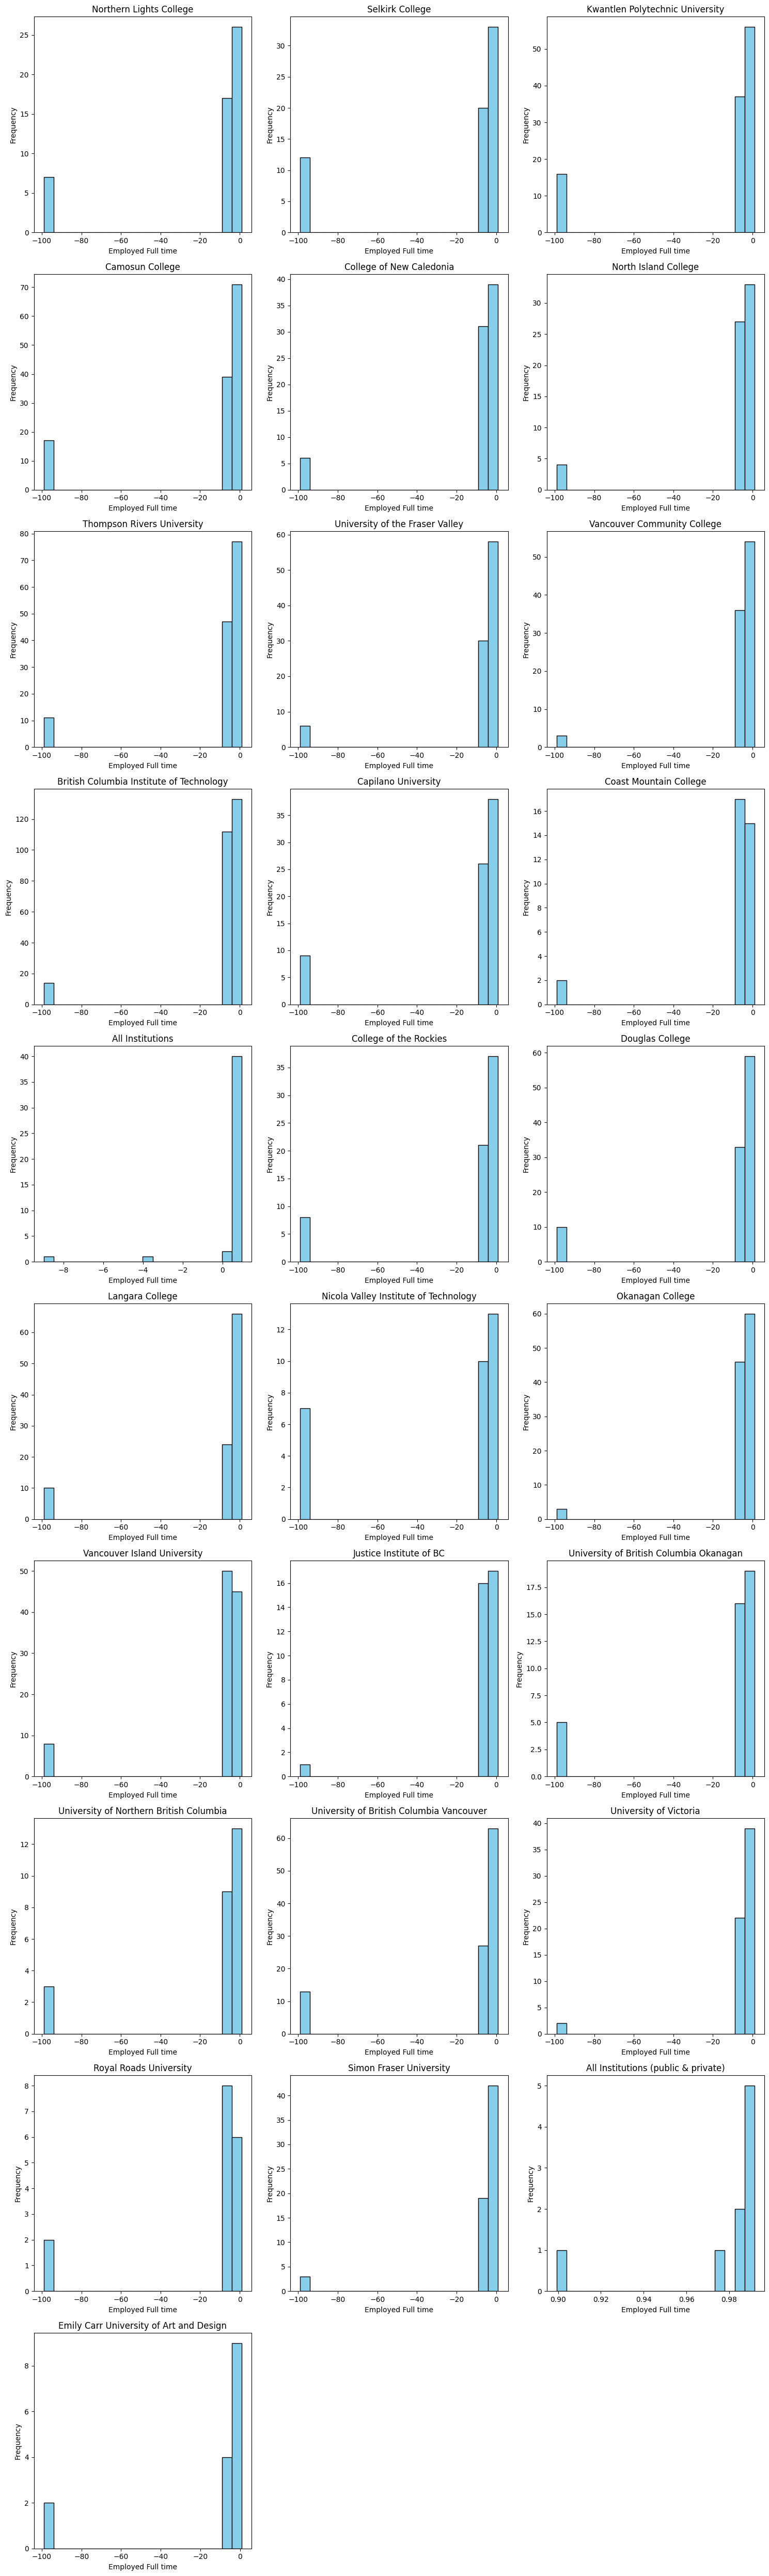

In [137]:

# Get the unique institution names
unique_institutions = data["INSTITUTION_NAME"].unique()

# Set the number of subplots based on the number of unique institutions
n_institutions = len(unique_institutions)
n_rows = (n_institutions + 2) // 3  # Arrange 3 histograms per row

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each unique institution and create a histogram
for i, institution in enumerate(unique_institutions):
    # Filter the data for the current institution
    institution_data = data[data["INSTITUTION_NAME"] == institution]

    # Create the histogram of the 'EMPLOY_FULL_TIME' column for the current institution
    axes[i].hist(institution_data['EMPLOY_FULL_TIME'], bins=20, edgecolor='black', color='skyblue')

    # Add title and labels
    axes[i].set_title(f'{institution}')
    axes[i].set_xlabel('Employed Full time')
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()

# Show the histograms
plt.show()

### Job Program Related

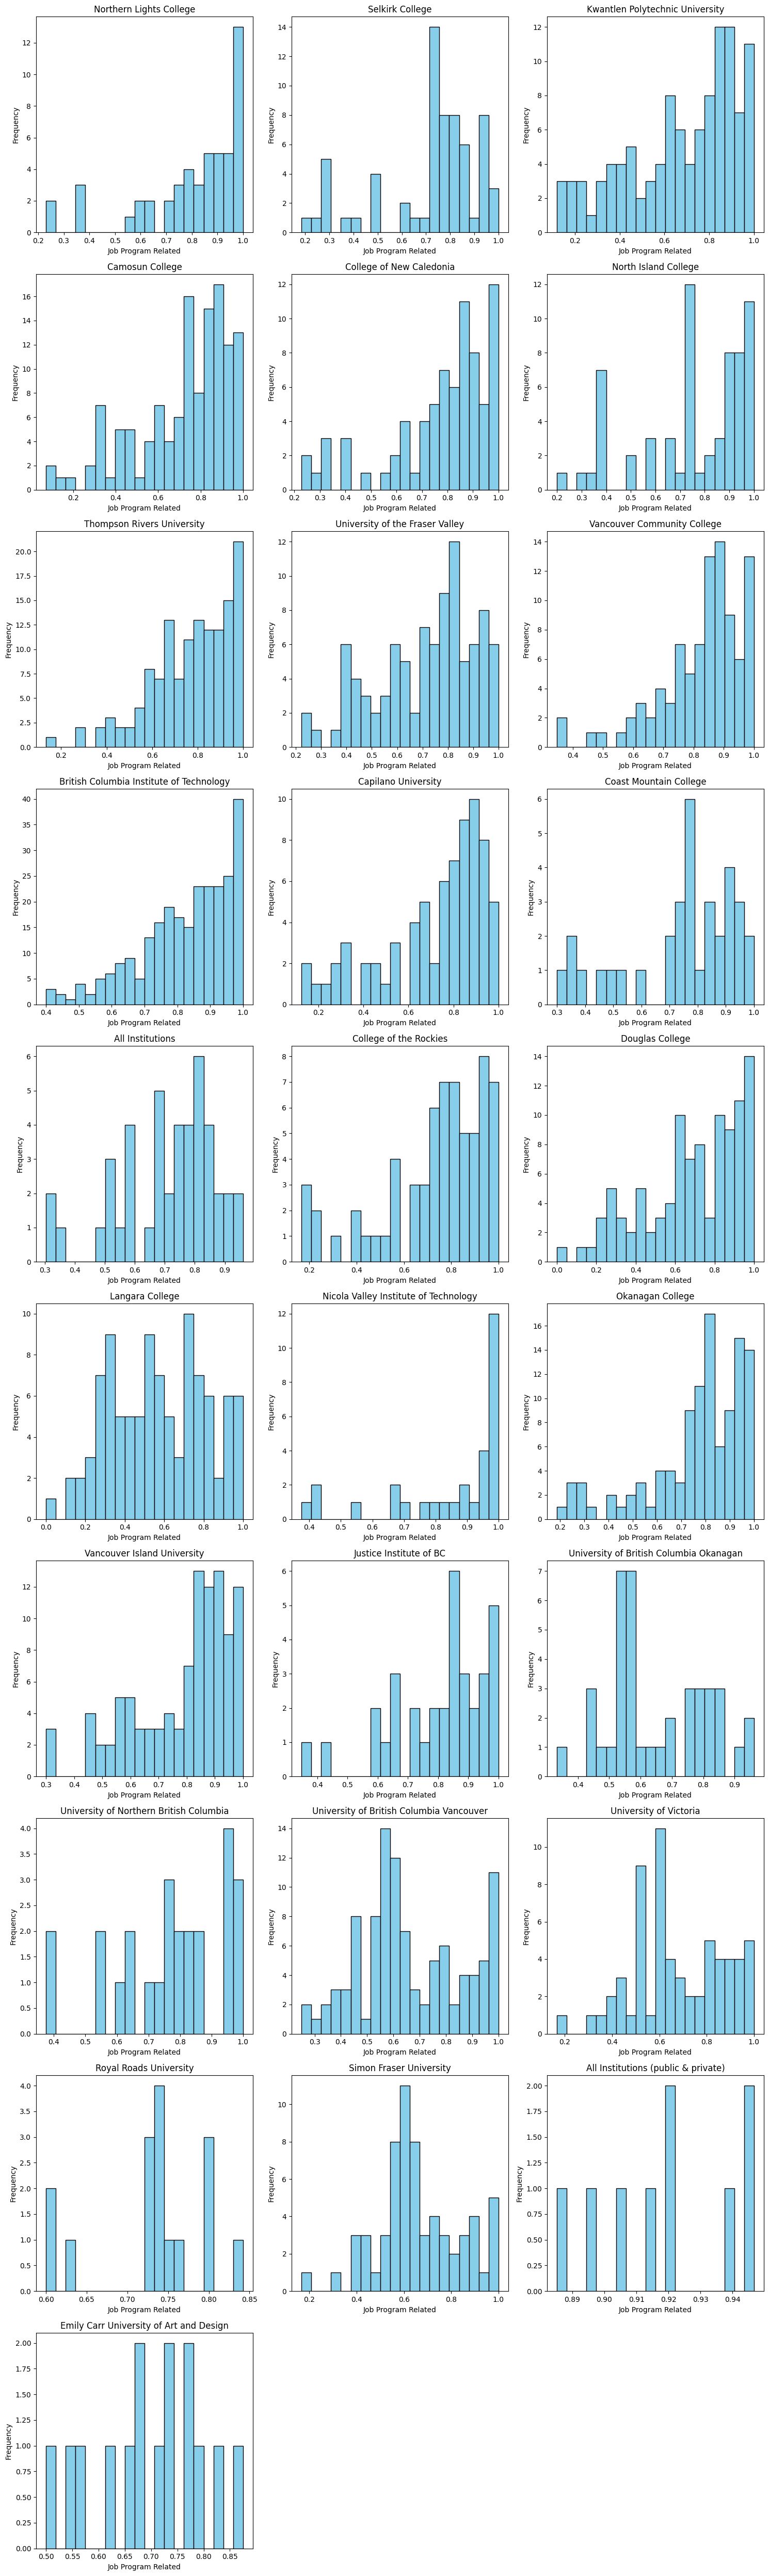

In [131]:
# Get the unique institution names
unique_institutions = data["INSTITUTION_NAME"].unique()

# Set the number of subplots based on the number of unique institutions
n_institutions = len(unique_institutions)
n_rows = (n_institutions + 2) // 3  # Arrange 3 histograms per row

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each unique institution and create a histogram
for i, institution in enumerate(unique_institutions):
    # Filter the data for the current institution
    institution_data = data[data["INSTITUTION_NAME"] == institution]

    # Create the histogram of the 'JOB_PROGRAM_RELATED' column for the current institution
    axes[i].hist(institution_data['JOB_PROGRAM_RELATED'], bins=20, edgecolor='black', color='skyblue')

    # Add title and labels
    axes[i].set_title(f'{institution}')
    axes[i].set_xlabel('Job Program Related')
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()

# Show the histograms
plt.show()

### Useful Perform Job

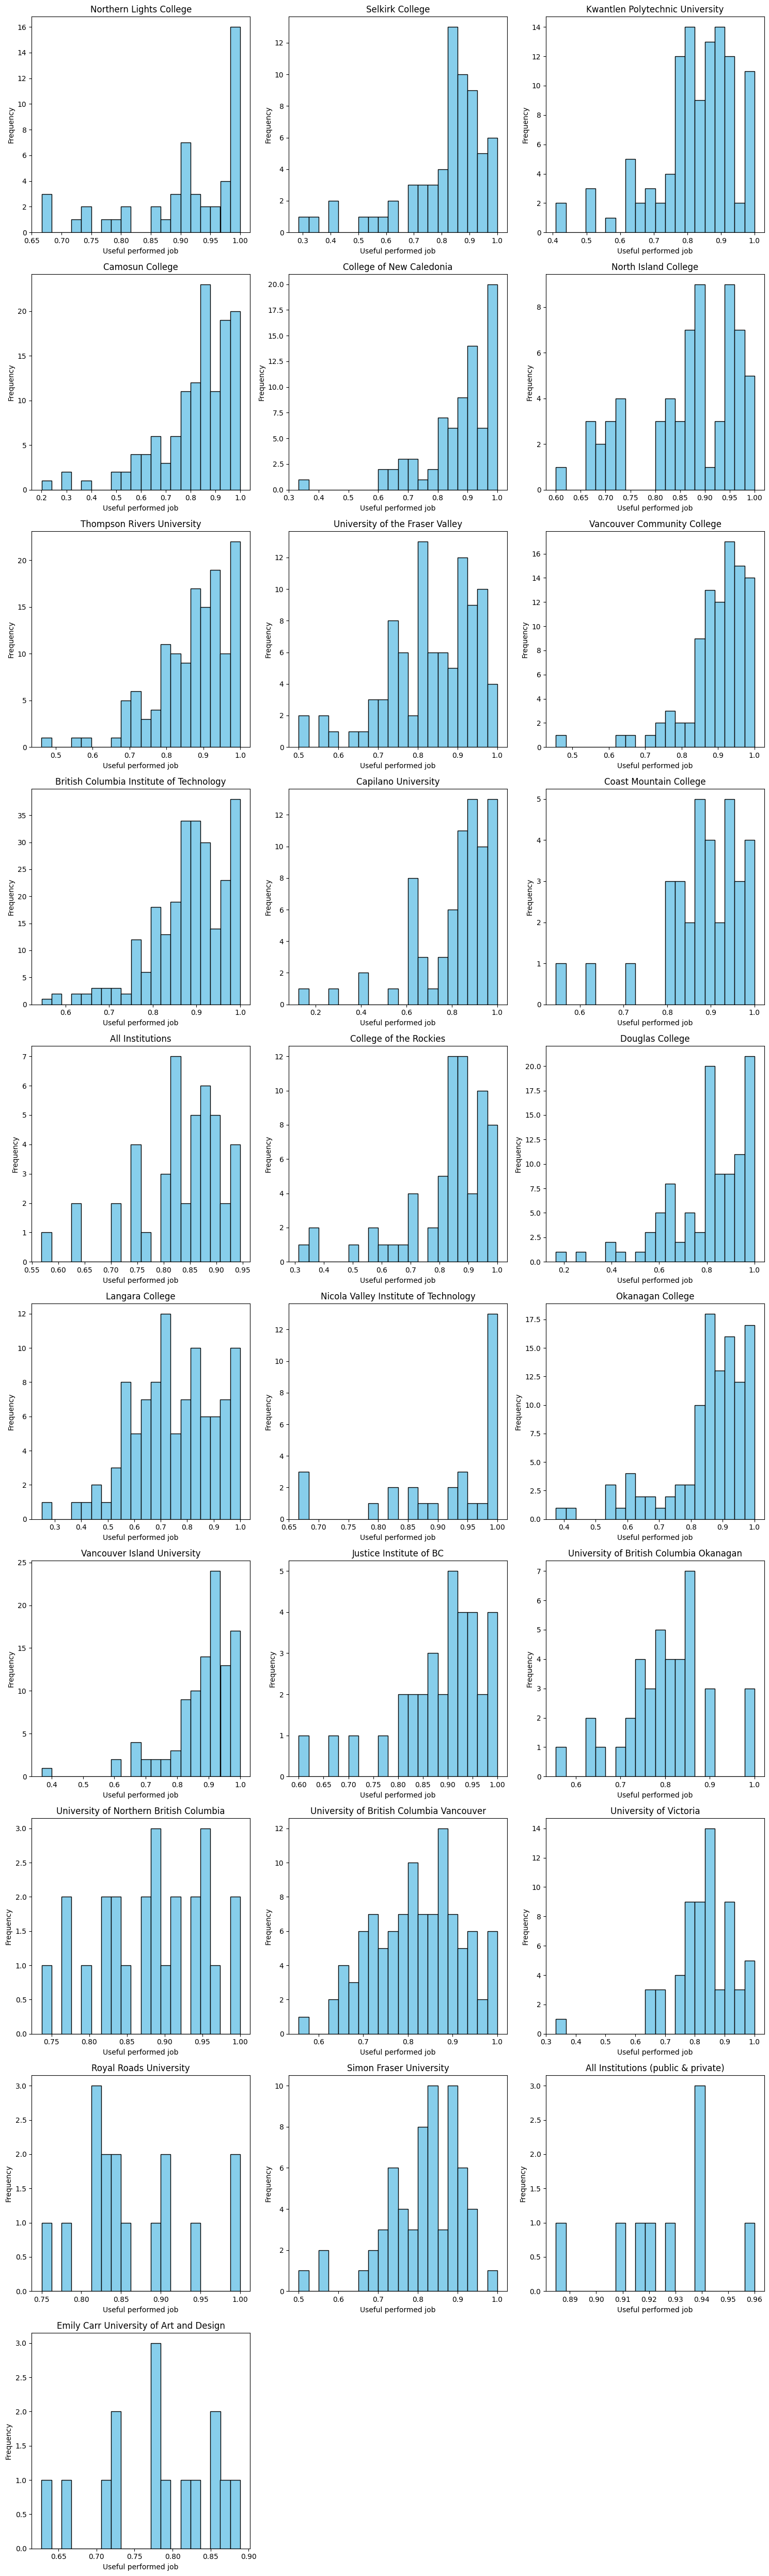

In [132]:
# Get the unique institution names
unique_institutions = data["INSTITUTION_NAME"].unique()

# Set the number of subplots based on the number of unique institutions
n_institutions = len(unique_institutions)
n_rows = (n_institutions + 2) // 3  # Arrange 3 histograms per row

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each unique institution and create a histogram
for i, institution in enumerate(unique_institutions):
    # Filter the data for the current institution
    institution_data = data[data["INSTITUTION_NAME"] == institution]

    # Create the histogram of the 'USEFUL_PERFORM_JOB' column for the current institution
    axes[i].hist(institution_data['USEFUL_PERFORM_JOB'], bins=20, edgecolor='black', color='skyblue')

    # Add title and labels
    axes[i].set_title(f'{institution}')
    axes[i].set_xlabel('Useful performed job')
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()

# Show the histograms
plt.show()

### In labor Market

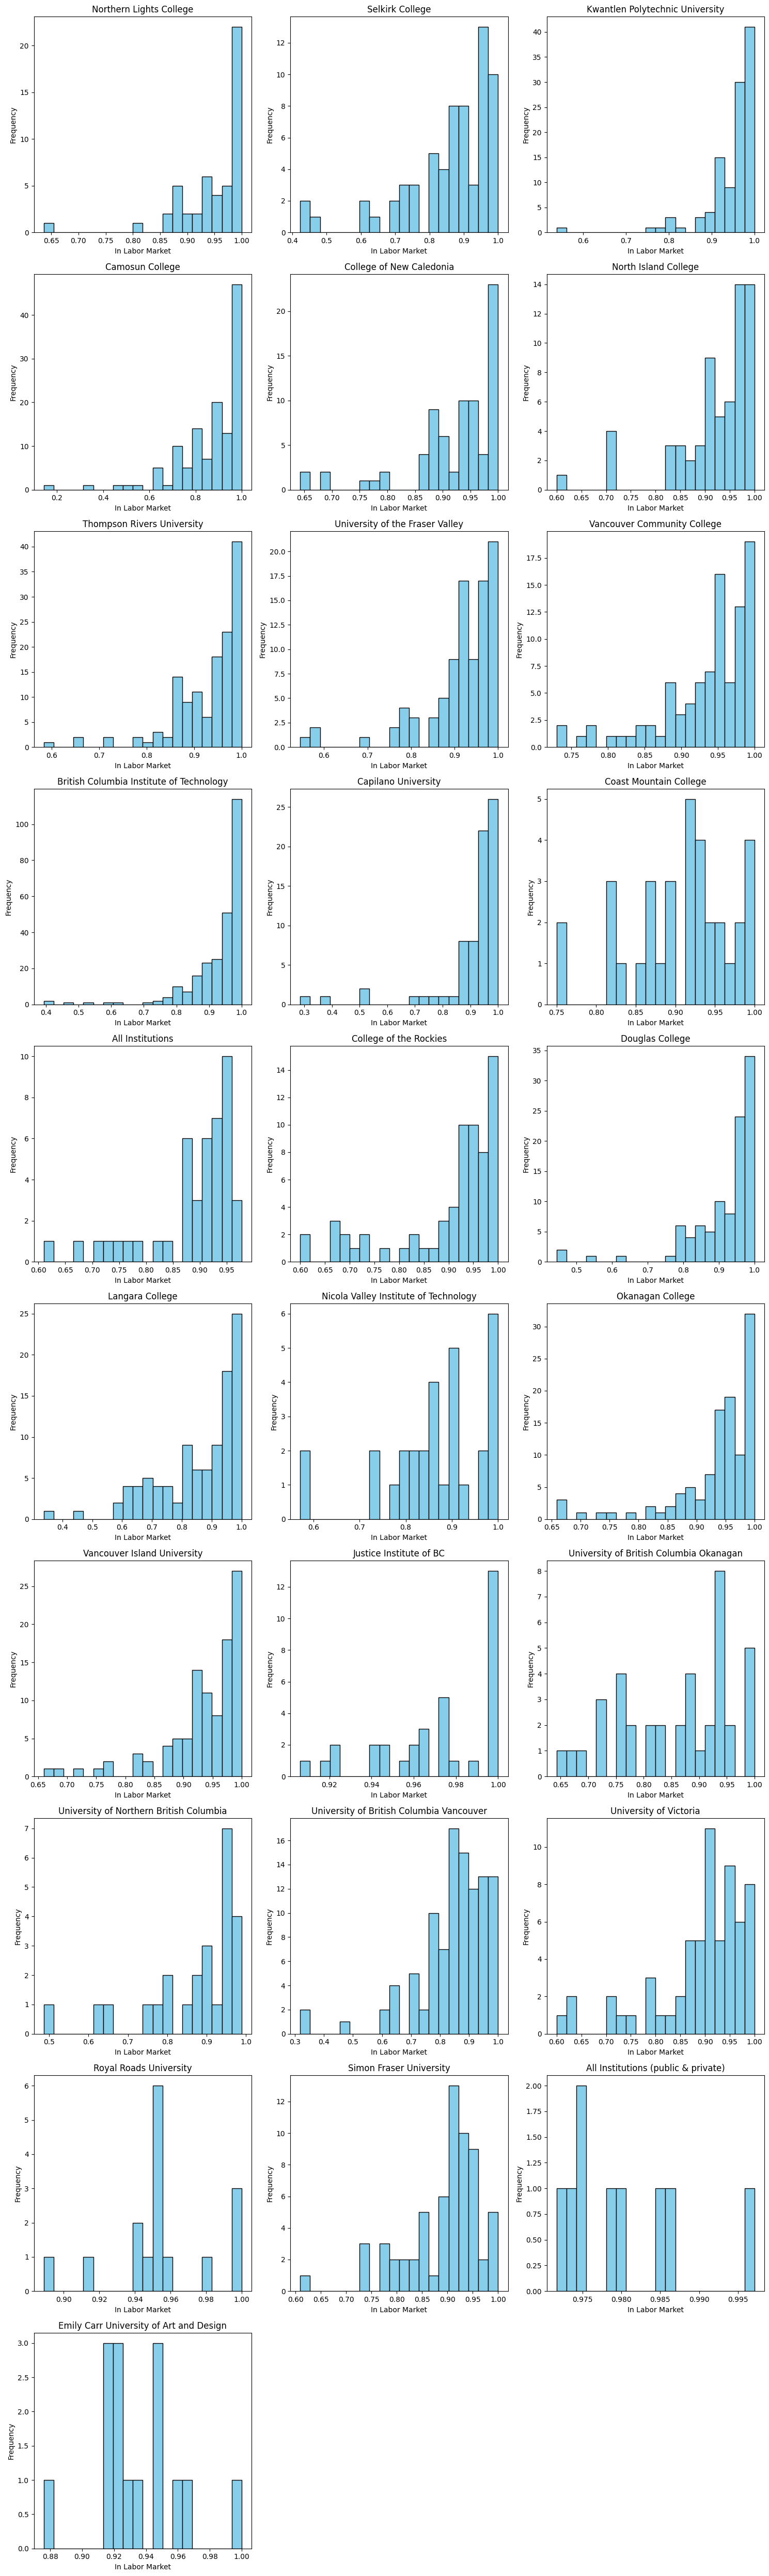

In [133]:
# Get the unique institution names
unique_institutions = data["INSTITUTION_NAME"].unique()

# Set the number of subplots based on the number of unique institutions
n_institutions = len(unique_institutions)
n_rows = (n_institutions + 2) // 3  # Arrange 3 histograms per row

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each unique institution and create a histogram
for i, institution in enumerate(unique_institutions):
    # Filter the data for the current institution
    institution_data = data[data["INSTITUTION_NAME"] == institution]

    # Create the histogram of the 'IN_LABR_MKT' column for the current institution
    axes[i].hist(institution_data['IN_LABR_MKT'], bins=20, edgecolor='black', color='skyblue')

    # Add title and labels
    axes[i].set_title(f'{institution}')
    axes[i].set_xlabel('In Labor Market')
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()

# Show the histograms
plt.show()

### Employed

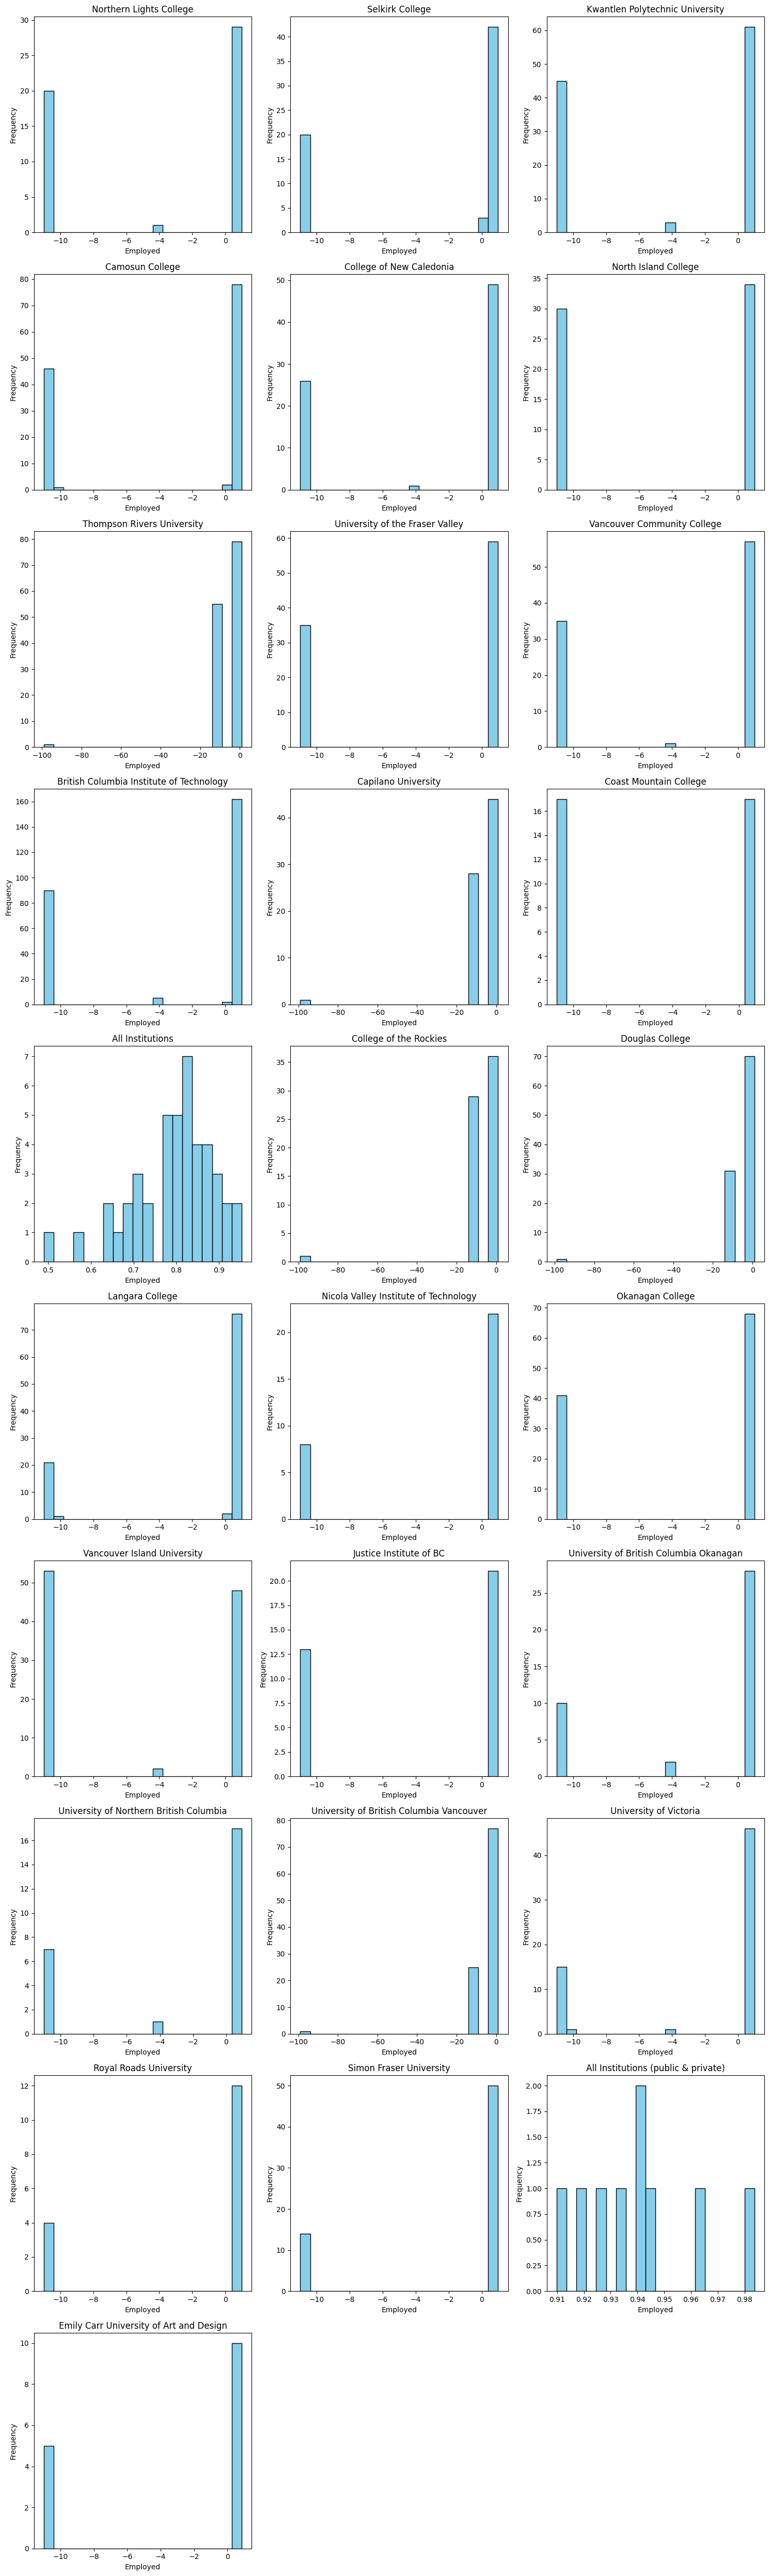

In [135]:
# Get the unique institution names
unique_institutions = data["INSTITUTION_NAME"].unique()

# Set the number of subplots based on the number of unique institutions
n_institutions = len(unique_institutions)
n_rows = (n_institutions + 2) // 3  # Arrange 3 histograms per row

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each unique institution and create a histogram
for i, institution in enumerate(unique_institutions):
    # Filter the data for the current institution
    institution_data = data[data["INSTITUTION_NAME"] == institution]

    # Create the histogram of the 'EMPLOYED' column for the current institution
    axes[i].hist(institution_data['EMPLOYED'], bins=20, edgecolor='black', color='skyblue')

    # Add title and labels
    axes[i].set_title(f'{institution}')
    axes[i].set_xlabel('Employed')
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()

# Show the histograms
plt.show()

### Unemployed

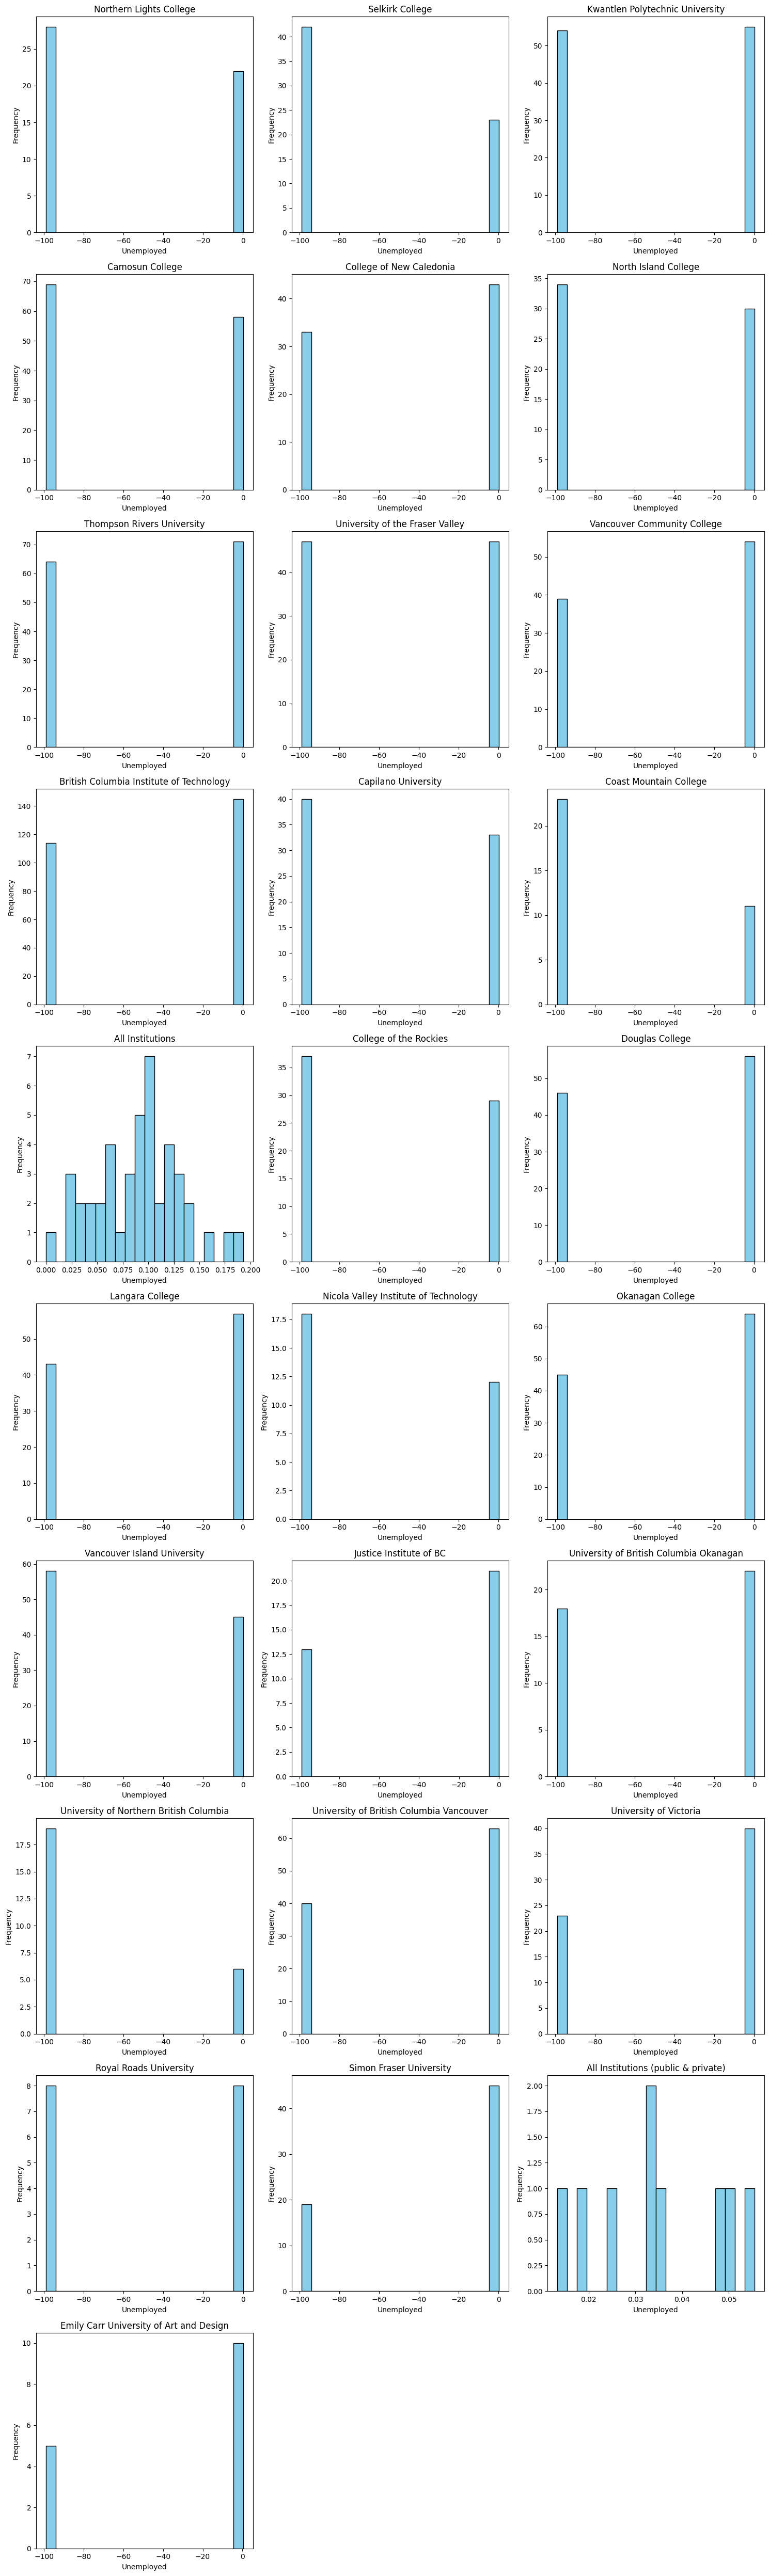

In [134]:
# Get the unique institution names
unique_institutions = data["INSTITUTION_NAME"].unique()

# Set the number of subplots based on the number of unique institutions
n_institutions = len(unique_institutions)
n_rows = (n_institutions + 2) // 3  # Arrange 3 histograms per row

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each unique institution and create a histogram
for i, institution in enumerate(unique_institutions):
    # Filter the data for the current institution
    institution_data = data[data["INSTITUTION_NAME"] == institution]

    # Create the histogram of the 'UNEMPLOYED' column for the current institution
    axes[i].hist(institution_data['UNEMPLOYED'], bins=20, edgecolor='black', color='skyblue')

    # Add title and labels
    axes[i].set_title(f'{institution}')
    axes[i].set_xlabel('Unemployed')
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()

# Show the histograms
plt.show()

### Salary Wage

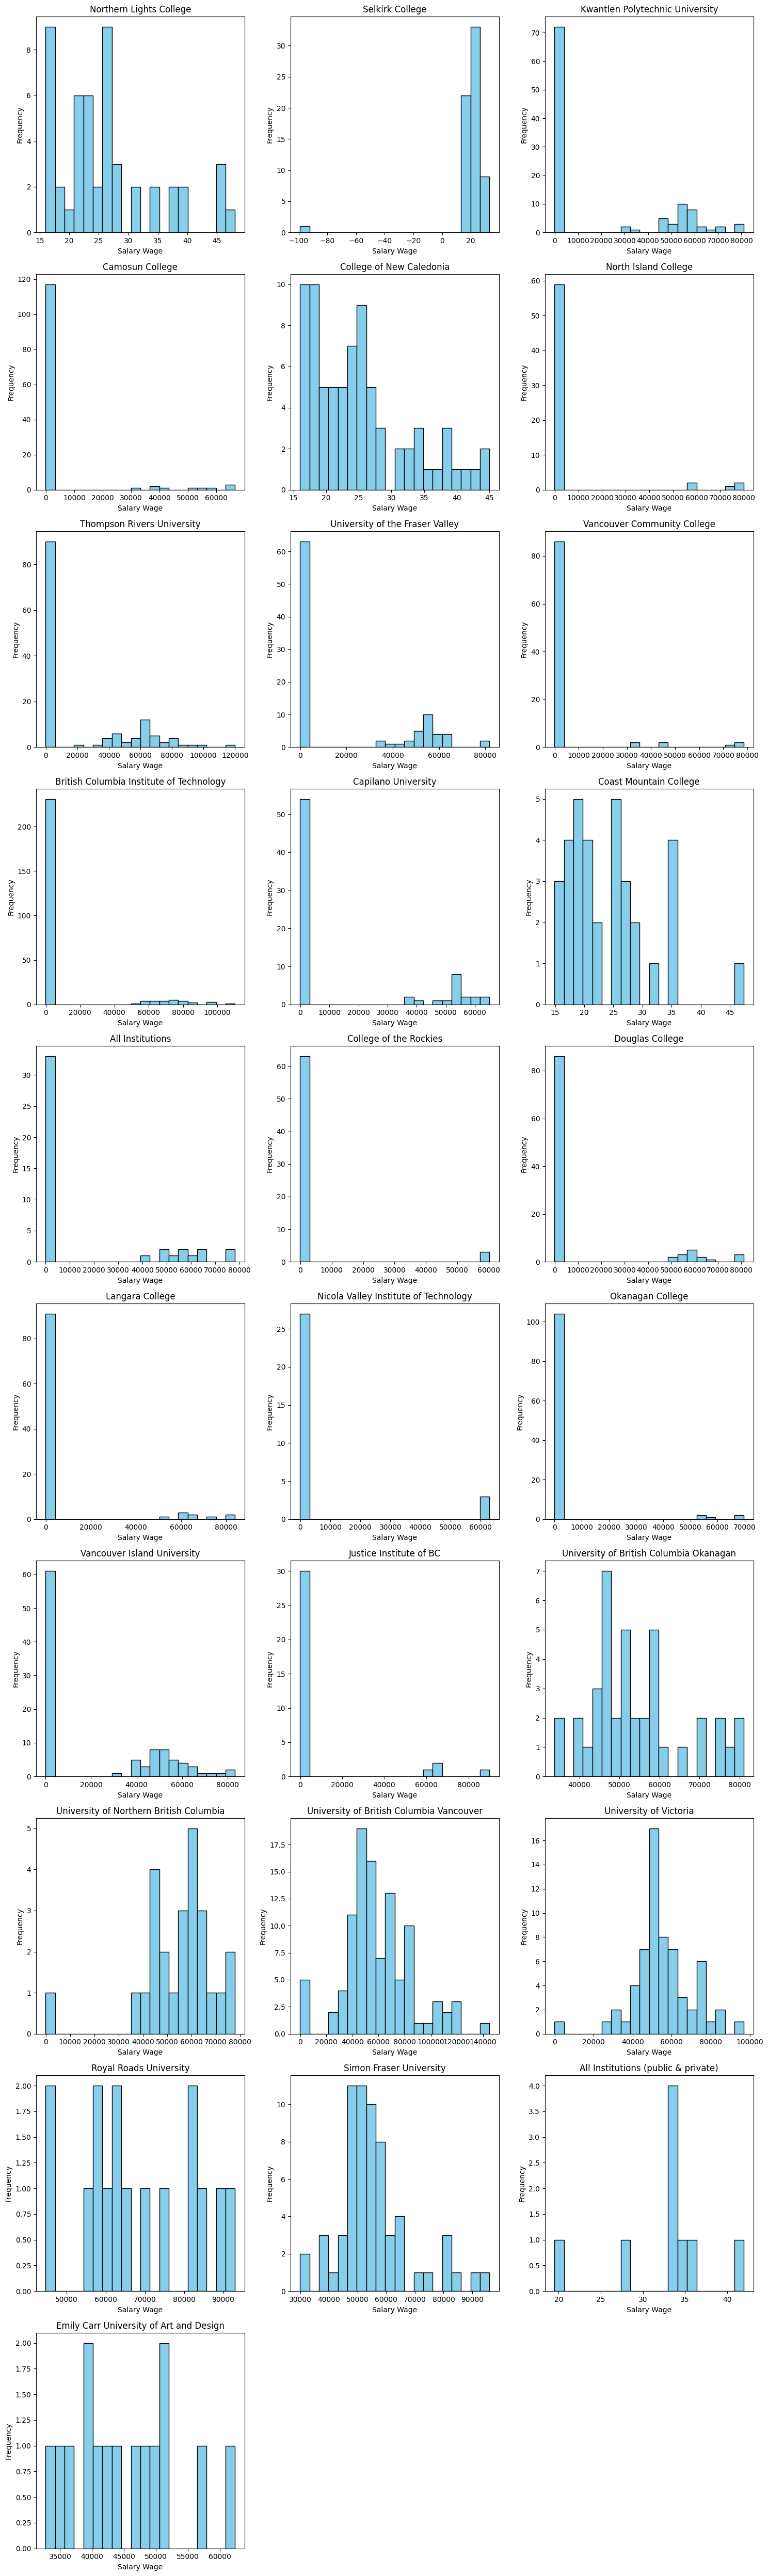

In [136]:
# Get the unique institution names
unique_institutions = data["INSTITUTION_NAME"].unique()

# Set the number of subplots based on the number of unique institutions
n_institutions = len(unique_institutions)
n_rows = (n_institutions + 2) // 3  # Arrange 3 histograms per row

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each unique institution and create a histogram
for i, institution in enumerate(unique_institutions):
    # Filter the data for the current institution
    institution_data = data[data["INSTITUTION_NAME"] == institution]

    # Create the histogram of the 'SALARY_WAGE' column for the current institution
    axes[i].hist(institution_data['SALARY_WAGE'], bins=20, edgecolor='black', color='skyblue')

    # Add title and labels
    axes[i].set_title(f'{institution}')
    axes[i].set_xlabel('Salary Wage')
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()

# Show the histograms
plt.show()

# Data Cleaning

Proposal for Data Cleaning:

-Column Removal:

Columns FURTH_STUDIES, Q11_7, and Q52_6 should be eliminated due to the high
number of null values.

-Filter Sections:

The "All Institutions" filter shows repeated values. Clarification is needed on how to eliminate these duplicates.

-Institution Code:

The Institution Code and Institution Name columns contain the same information. It is recommended to remove the Institution Code column.

-Gender Distribution:

The gender distribution data contains disproportionately large negative percentages, which are not meaningful. These values should be removed.

-Employment Data:

In the "Self Employed" and "Employed Full Time" categories, there are numerous instances of "too few responses to report." It is suggested to eliminate these values and adjust the coding accordingly.

-Employment Status:

Negative percentages appear in both the "Employed" and "Unemployed" categories. The percentages for "All Institutions" seem the most reasonable. It is proposed to create a separate DataFrame that includes only the information for "All Institutions."

-Salary Wage Data:

The Salary Wage data currently mixes annual salaries with hourly wages. It is suggested to convert all entries to hourly wage for consistency.